In [36]:
%pip install pandas
%pip install scikit-learn
%pip install numpy
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
amr_data = pd.read_csv("/Users/admin/AMR/data/cleaned/amr_cleaned.csv")

In [39]:
amr_data.isna().sum()

geography            0
stratum              0
date              2655
resistance_pct       0
organism             0
dtype: int64

In [40]:
amr_data.head()

,geography,stratum,date,resistance_pct,organism
0,East Midlands,Glycopeptides,2020-08-01,22.67,e_faecalis
1,East Midlands,Glycopeptides,2020-09-01,20.67,e_faecalis
2,East Midlands,Glycopeptides,2020-10-01,18.67,e_faecalis
3,East Midlands,Glycopeptides,2020-11-01,22.00,e_faecalis
4,East Midlands,Glycopeptides,2020-12-01,24.67,e_faecalis


In [41]:
amr_data["date"] = pd.to_datetime(amr_data["date"])

In [42]:
amr_data.dtypes

geography                 object
stratum                   object
date              datetime64[ns]
resistance_pct           float64
organism                  object
dtype: object

In [43]:
amr_data = amr_data.sort_values(
    by=["organism", "geography", "stratum", "date"]
)

In [44]:
amr_data.tail(100)

,geography,stratum,date,resistance_pct,organism
11045,Yorkshire and Humber,Macrolides,2022-02-01,3.95,s_pneumoniae
11046,Yorkshire and Humber,Macrolides,2022-03-01,3.03,s_pneumoniae
11047,Yorkshire and Humber,Macrolides,2022-04-01,2.50,s_pneumoniae
11048,Yorkshire and Humber,Macrolides,2022-05-01,1.18,s_pneumoniae
11049,Yorkshire and Humber,Macrolides,2022-06-01,1.18,s_pneumoniae
...,...,...,...,...,...
11140,Yorkshire and Humber,Penicillin,2025-02-01,0.85,s_pneumoniae
11141,Yorkshire and Humber,Penicillin,2025-03-01,2.22,s_pneumoniae
11142,Yorkshire and Humber,Penicillin,2025-04-01,1.18,s_pneumoniae
11143,Yorkshire and Humber,Penicillin,2025-05-01,3.65,s_pneumoniae


Each series (One Organism + Antibiotic + Region)

In [45]:
series_counts = (
    amr_data.groupby(["organism", "geography", "stratum"])
    .size()
    .reset_index(name="n_months")
)
series_counts.to_csv("seriest.csv")

In [46]:
amr_data_filtered = amr_data.copy()

In [47]:
amr_data_filtered = amr_data_filtered.sort_values(
    ["organism", "geography", "stratum", "date"]
)

12 month lag features 
ML dont have a built in memory like ARIMA so we create lags

In [48]:
for lag in range(1,13):
    amr_data_filtered[f"lag_{lag}"] = (
        amr_data_filtered
        .groupby(["organism", "geography", "stratum" ])["resistance_pct"]
        .shift(lag)
    )

In [49]:
amr_data_filtered.shape

(11145, 17)

In [50]:

amr_data_filtered["target_month"] = (
    amr_data_filtered
    .groupby(["organism", "geography", "stratum"])["resistance_pct"]
    .shift(-1)
)

In [51]:
amr_data_filtered.isna().sum()

geography            0
stratum              0
date              2655
resistance_pct       0
organism             0
lag_1              144
lag_2              288
lag_3              432
lag_4              576
lag_5              720
lag_6              864
lag_7             1008
lag_8             1152
lag_9             1296
lag_10            1440
lag_11            1584
lag_12            1728
target_month       144
dtype: int64

In [52]:
ml_df = amr_data_filtered.dropna().copy()


In [53]:
ml_df.head()

,geography,stratum,date,resistance_pct,organism,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,target_month
12,East Midlands,Glycopeptides,2021-08-01,43.67,e_faecalis,43.33,40.67,41.33,39.67,41.33,36.67,33.67,24.67,22.00,18.67,20.67,22.67,42.67
13,East Midlands,Glycopeptides,2021-09-01,42.67,e_faecalis,43.67,43.33,40.67,41.33,39.67,41.33,36.67,33.67,24.67,22.00,18.67,20.67,38.33
14,East Midlands,Glycopeptides,2021-10-01,38.33,e_faecalis,42.67,43.67,43.33,40.67,41.33,39.67,41.33,36.67,33.67,24.67,22.00,18.67,35.00
15,East Midlands,Glycopeptides,2021-11-01,35.00,e_faecalis,38.33,42.67,43.67,43.33,40.67,41.33,39.67,41.33,36.67,33.67,24.67,22.00,31.00
16,East Midlands,Glycopeptides,2021-12-01,31.00,e_faecalis,35.00,38.33,42.67,43.67,43.33,40.67,41.33,39.67,41.33,36.67,33.67,24.67,29.67


In [54]:
ml_df = ml_df.sort_values(
    ["organism", "geography", "stratum", "date"]
)

In [55]:
ml_df.shape

(6663, 18)

In [56]:
amr_data.shape

(11145, 5)

In [76]:
train_end = "2023-06-01"
val_end = "2024-06-01"

In [78]:
train_df = ml_df[ml_df["date"] < train_end]
val_df   = ml_df[(ml_df["date"] >= train_end) & (ml_df["date"]< val_end)]
test_df  = ml_df[ml_df["date"] >= val_end]

In [81]:
train_df.info


<bound method DataFrame.info of                   geography        stratum       date  resistance_pct  \
12            East Midlands  Glycopeptides 2021-08-01           43.67   
13            East Midlands  Glycopeptides 2021-09-01           42.67   
14            East Midlands  Glycopeptides 2021-10-01           38.33   
15            East Midlands  Glycopeptides 2021-11-01           35.00   
16            East Midlands  Glycopeptides 2021-12-01           31.00   
...                     ...            ...        ...             ...   
11115  Yorkshire and Humber     Penicillin 2023-01-01            0.57   
11116  Yorkshire and Humber     Penicillin 2023-02-01            1.09   
11117  Yorkshire and Humber     Penicillin 2023-03-01            0.66   
11118  Yorkshire and Humber     Penicillin 2023-04-01            0.65   
11119  Yorkshire and Humber     Penicillin 2023-05-01            0.00   

           organism  lag_1  lag_2  lag_3  lag_4  lag_5  lag_6  lag_7  lag_8  \
12       e_f

Time-based train/test split

In [83]:
feature_cols = [
    "lag_1", "lag_2", "lag_3", "lag_4",
    "lag_5", "lag_6", "lag_7", "lag_8",
    "lag_9", "lag_10", "lag_11", "lag_12"
]
target = "target_month"

In [84]:
X_train = train_df[feature_cols]
y_train=train_df[target]

X_val = val_df[feature_cols]
y_val = val_df[target]

X_test = test_df[feature_cols]
y_test = test_df[target]


In [96]:
print(X_train.shape, X_val.shape, X_test.shape)
print(X_train.isna().sum().sum())



(3162, 12) (1728, 12) (1773, 12)
0


Baseline / Benchmark Linear Regression

In [86]:
%pip install scikit-learn



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [98]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_val = lr.predict(X_val)

print("LR Validation MAE: ", mean_absolute_error(y_val,lr_val))
print("LR Validation RMSE: ", np.sqrt(mean_squared_error(y_val, lr_val)))

LR Validation MAE:  1.8279039772960177
LR Validation RMSE:  2.4464177550048767


In [99]:
lr_test_preds = lr.predict(X_test)

print("LR Test MAE:", mean_absolute_error(y_test, lr_test_preds))
print("LR Test RMSE:", np.sqrt(mean_squared_error(y_test, lr_test_preds)))


LR Test MAE: 1.8810464602058259
LR Test RMSE: 2.4994314425804602


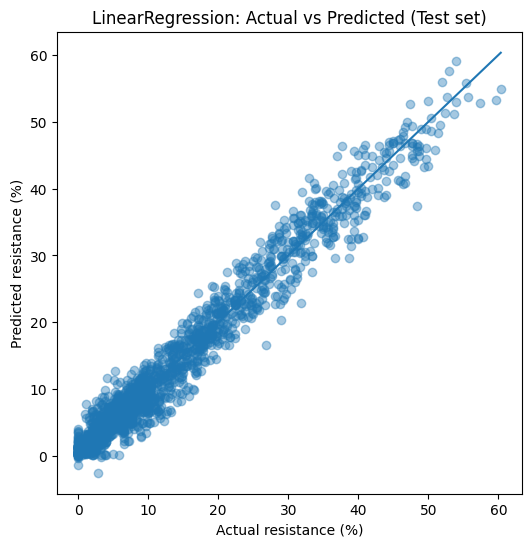

In [100]:
plt.figure(figsize=(6,6))
plt.scatter(y_test,lr_test_preds, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.xlabel("Actual resistance (%)")
plt.ylabel("Predicted resistance (%)")
plt.title("LinearRegression: Actual vs Predicted (Test set)")
plt.show()

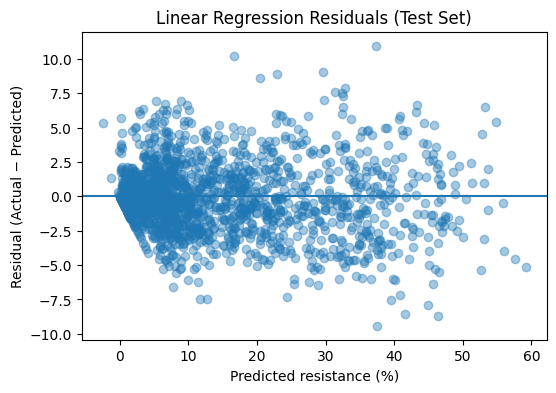

In [101]:
residuals = y_test - lr_test_preds

plt.figure(figsize=(6,4))
plt.scatter(lr_test_preds, residuals, alpha=0.4)
plt.axhline(0)
plt.xlabel("Predicted resistance (%)")
plt.ylabel("Residual (Actual − Predicted)")
plt.title("Linear Regression Residuals (Test Set)")
plt.show()

Linear regression achieved a test MAE OF 1.89% and RMSE of 2.49%.
Linear regression achieved a val MAE OF 1.78% and RMSE of 2.30%.
This shows strong baseline predictive capability.
But its linear assumptions limitits ability to capture complex temporal patterns.
Non - linear models will be explored.

Random Forest

In [73]:
from sklearn.ensemble import RandomForestRegressor


In [102]:
X_test.head()
y_test.head()

46    29.00
47    32.33
48    31.00
49    36.67
50    38.67
Name: target_month, dtype: float64

In [108]:
X_train.to_csv("X train")

In [104]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=5,
    random_state=42,
    n_jobs=1
)
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples 

In [105]:
rf_val = rf.predict(X_val)
print("RF Validation mae: ", mean_absolute_error(y_val, rf_val))
print("RF validation RMSE: ", np.sqrt(mean_squared_error(y_val, rf_val)))

RF Validation mae:  2.0168942731185684
RF validation RMSE:  2.684745415096582


In [106]:
rf_test = rf.predict(X_test)
print("RF Test mae: ", mean_absolute_error(y_test, rf_test))
print("RF Test RMSE: ", np.sqrt(mean_squared_error(y_test, rf_test)))


RF Test mae:  2.037802557426882
RF Test RMSE:  2.7295584611438493


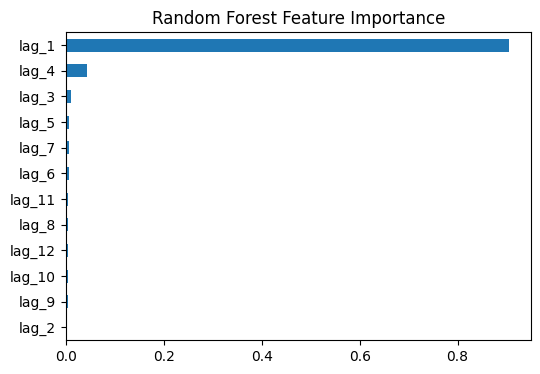

In [107]:
rf_feature_importance = pd.Series(
    rf.feature_importances_,
    index = feature_cols
).sort_values()
rf_feature_importance.plot(kind="barh", figsize=(6,4), title="Random Forest Feature Importance")
plt.show()

In [1]:
%pip install xgboost
from xgboost import XGBRegressor


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: @rpath/libomp.dylib\n  Referenced from: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


XGBoostError: 
XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed
    - vcomp140.dll or libgomp-1.dll for Windows
    - libomp.dylib for Mac OSX
    - libgomp.so for Linux and other UNIX-like OSes
    Mac OSX users: Run `brew install libomp` to install OpenMP runtime.

  * You are running 32-bit Python on a 64-bit OS

Error message(s): ['dlopen(/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: @rpath/libomp.dylib\n  Referenced from: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
